In [1]:
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
import datetime
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
 
# def parser(x):
#  return datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('AMC.csv')

In [2]:
backshift = series.shift(-1)
print(backshift)

                           Date     Close
0     2013-12-19 00:00:00-05:00  2.640325
1     2013-12-20 00:00:00-05:00  2.650026
2     2013-12-23 00:00:00-05:00  2.653070
3     2013-12-24 00:00:00-05:00  2.642375
4     2013-12-26 00:00:00-05:00  2.655094
...                         ...       ...
2018  2021-12-27 00:00:00-05:00  3.356897
2019  2021-12-28 00:00:00-05:00  3.322154
2020  2021-12-29 00:00:00-05:00  3.330417
2021  2021-12-30 00:00:00-05:00  3.365225
2022                        NaN       NaN

[2023 rows x 2 columns]


In [3]:
diff = backshift['Close'] - series['Close']
diff = diff.dropna()

In [4]:
print(diff)

0       0.030739
1       0.009702
2       0.003044
3      -0.010695
4       0.012719
          ...   
2017   -0.005594
2018    0.006292
2019   -0.034743
2020    0.008263
2021    0.034808
Name: Close, Length: 2022, dtype: float64


<AxesSubplot:xlabel='Close', ylabel='Count'>

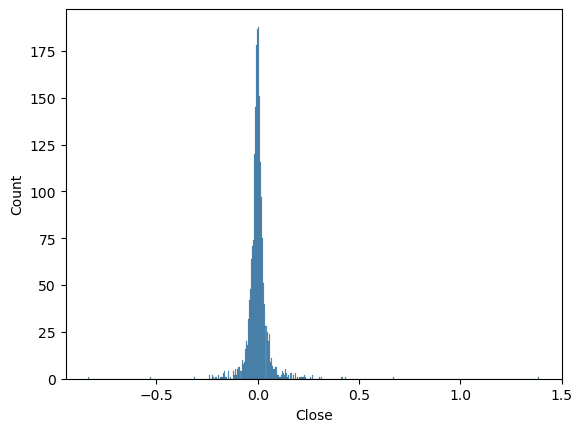

In [5]:
import seaborn as sns

sns.histplot(diff)

f:\Conda\envs\ml\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


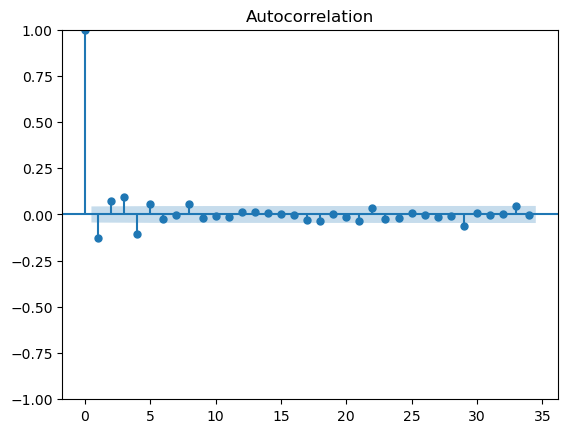

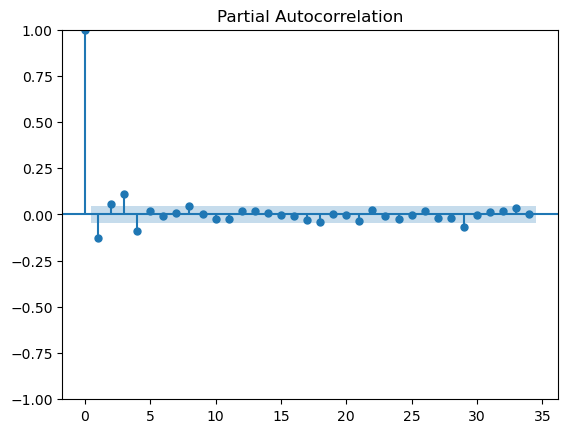

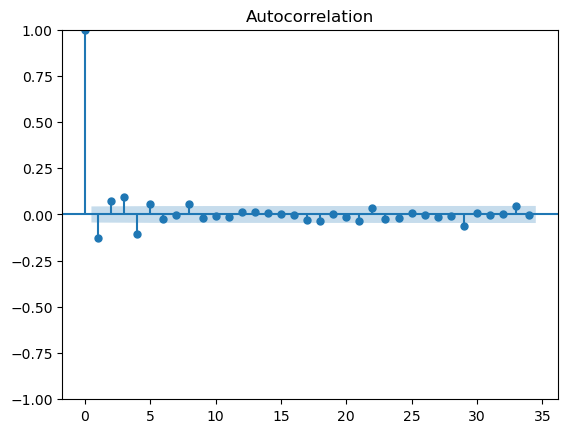

In [6]:
plot_pacf(diff)
plot_acf(diff)

In [7]:
series = series['Close'].values

In [8]:
series = diff.values

In [9]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
train = series[:len(series) * 9 // 10]
test = series[len(series) * 9 // 10:]

In [10]:
print(train)
print(len(train))

[ 0.03073942  0.00970169  0.00304388 ... -0.06390376  0.04272874
  0.08213571]
1819


In [11]:
print(test)

[ 2.29574453e-01 -7.54237239e-02  4.06376415e-02  3.19330162e-02
 -5.01251992e-03 -1.09116504e-01 -1.58429901e-01 -1.67054020e-01
  1.92981374e-01 -6.61241614e-02  1.06849593e-02  0.00000000e+00
 -1.36189207e-02 -8.69223821e-02  1.25351666e-01 -3.94092187e-02
 -3.49162077e-02 -6.11004127e-03 -3.85263560e-02 -8.87500253e-02
  2.52018225e-02  5.60894902e-02  5.71583345e-02 -5.92997119e-02
  3.47586257e-02 -4.01321144e-02  5.24779387e-02  2.12451130e-02
  1.68738574e-02  1.23888608e-01 -3.48432075e-03 -5.46975995e-02
 -6.17774136e-02 -1.68071262e-02 -3.24242891e-02 -3.35109564e-02
 -2.37080352e-02 -1.87127173e-02  5.51193233e-02  2.38971935e-02
  3.13315593e-02  2.65110770e-02  2.13014975e-01  1.63109701e-02
  7.20698186e-02  5.71838049e-03 -1.04331459e-01 -7.14573510e-03
 -3.81694946e-02  1.24383748e-01  1.81955961e-01  1.75595741e-01
  3.04412545e-01 -1.51978460e-02  2.04283814e-01  6.68981074e-01
 -1.97496046e-01 -6.91459307e-02  1.38008938e-01  9.08664077e-04
 -1.09506735e-01 -1.41963

In [12]:
model = ARIMA(train, order = (10, 0, 0))

In [13]:
model_fit = model.fit()

In [14]:
output = model_fit.forecast()

In [15]:
history = [x for x in train]

In [16]:
from sklearn.metrics import mean_squared_error

predicted=-0.003395, expected=0.229574
predicted=0.042480, expected=-0.075424
predicted=0.080681, expected=0.040638
predicted=0.036401, expected=0.031933
predicted=0.015750, expected=-0.005013
predicted=0.080338, expected=-0.109117
predicted=0.058530, expected=-0.158430
predicted=0.020569, expected=-0.167054
predicted=-0.009896, expected=0.192981
predicted=-0.036299, expected=-0.066124
predicted=0.030751, expected=0.010685
predicted=0.003833, expected=0.000000
predicted=-0.065641, expected=-0.013619
predicted=-0.018083, expected=-0.086922
predicted=-0.028546, expected=0.125352
predicted=-0.062369, expected=-0.039409
predicted=-0.006336, expected=-0.034916
predicted=0.010934, expected=-0.006110
predicted=-0.027364, expected=-0.038526
predicted=0.002295, expected=-0.088750
predicted=-0.002613, expected=0.025202
predicted=-0.034133, expected=0.056089


f:\Conda\envs\ml\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=-0.019061, expected=0.057158
predicted=0.008005, expected=-0.059300
predicted=0.007674, expected=0.034759
predicted=-0.022216, expected=-0.040132
predicted=-0.011938, expected=0.052478
predicted=-0.002694, expected=0.021245
predicted=-0.002077, expected=0.016874
predicted=0.015484, expected=0.123889
predicted=0.002406, expected=-0.003484
predicted=0.038552, expected=-0.054698
predicted=0.034211, expected=-0.061777
predicted=-0.005805, expected=-0.016807
predicted=-0.000236, expected=-0.032424
predicted=0.013797, expected=-0.033511
predicted=0.007849, expected=-0.023708
predicted=-0.005915, expected=-0.018713
predicted=-0.009612, expected=0.055119
predicted=-0.018112, expected=0.023897
predicted=-0.010295, expected=0.031332
predicted=-0.010608, expected=0.026511
predicted=-0.014677, expected=0.213015
predicted=-0.011523, expected=0.016311
predicted=0.046977, expected=0.072070
predicted=0.040261, expected=0.005718
predicted=0.021558, expected=-0.104331
predicted=0.056889, expec

f:\Conda\envs\ml\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=-0.020798, expected=-0.058254
predicted=0.012036, expected=0.023145


f:\Conda\envs\ml\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.007065, expected=-0.019993
predicted=0.010109, expected=-0.029543
predicted=0.010857, expected=-0.050412
predicted=-0.009148, expected=-0.046818
predicted=-0.005224, expected=-0.118379
predicted=-0.020806, expected=0.115994
predicted=-0.043416, expected=-0.024469
predicted=-0.008691, expected=0.033086
predicted=0.006416, expected=-0.062568
predicted=-0.024868, expected=-0.006319
predicted=-0.016855, expected=0.047053
predicted=-0.035575, expected=0.012023
predicted=-0.005221, expected=0.064221
predicted=0.001070, expected=0.040362
predicted=0.007169, expected=-0.016552
predicted=0.021874, expected=-0.077629
predicted=0.012667, expected=0.017295
predicted=-0.011198, expected=0.066607
predicted=-0.001016, expected=0.185127
predicted=0.019392, expected=-0.006801
predicted=0.054673, expected=-0.086680
predicted=0.047121, expected=0.013062
predicted=-0.009810, expected=0.059183
predicted=0.005758, expected=0.084064
predicted=0.028645, expected=-0.075791
predicted=0.042200, expec

f:\Conda\envs\ml\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.011009, expected=-0.092621
predicted=-0.004083, expected=-0.037168
predicted=-0.017362, expected=0.031942
predicted=-0.029859, expected=-0.002498
predicted=-0.014369, expected=0.000750
predicted=-0.015066, expected=-0.017905
predicted=-0.022606, expected=-0.060577
predicted=-0.023493, expected=-0.039989
predicted=-0.032194, expected=0.068505
predicted=-0.035293, expected=0.010455
predicted=-0.007164, expected=-0.044936


f:\Conda\envs\ml\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.002080, expected=0.007856
predicted=-0.016917, expected=-0.006225
predicted=-0.009395, expected=0.034951
predicted=-0.008087, expected=-0.025224
predicted=-0.003257, expected=0.001612
predicted=0.000341, expected=-0.011611
predicted=-0.007688, expected=0.029174
predicted=-0.001337, expected=0.055413
predicted=0.002559, expected=0.016583
predicted=0.013861, expected=0.054687
predicted=0.010117, expected=-0.053215
predicted=0.017503, expected=0.001959
predicted=0.008645, expected=-0.040944
predicted=0.000325, expected=-0.069648
predicted=0.009109, expected=0.006265
predicted=-0.010971, expected=-0.021406
predicted=-0.001986, expected=-0.036440
predicted=0.002470, expected=0.013431
predicted=-0.018787, expected=0.003966
predicted=-0.013881, expected=0.046944
predicted=-0.012776, expected=0.045354
predicted=-0.013385, expected=0.050274
predicted=0.003688, expected=-0.018308
predicted=0.006625, expected=0.040372
predicted=0.001887, expected=0.077494
predicted=0.008220, expected=

f:\Conda\envs\ml\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=-0.018674, expected=-0.005594
predicted=-0.006252, expected=0.006292
predicted=-0.006807, expected=-0.034743
predicted=0.015618, expected=0.008263
predicted=0.019441, expected=0.034808
Test RMSE: 0.097


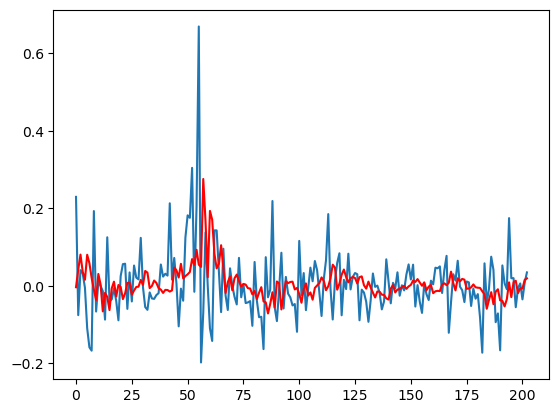

In [17]:
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(10,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

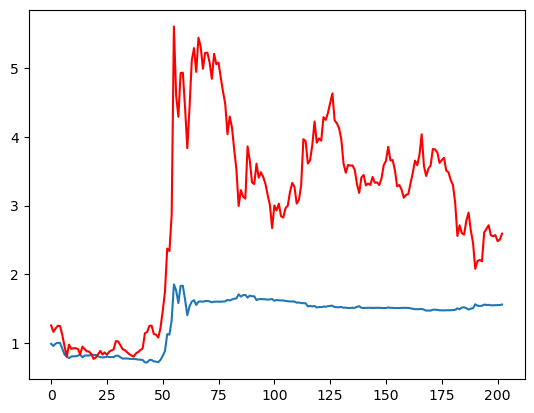

In [24]:
import math

initial = 1
naivev = 1
retGraph = []
naive = []
alpha = 10
for i in range(len(test)):
    ret = math.exp(test[i]) - 1
    weight = alpha * predictions[i]
    if(abs(predictions[i]) > 0.000):
        initial += weight * ret
    # if(predictions[i] > 0):
    #     initial += -predictions[i] * 1000 + predictions[i] * 1000 * ret;
    # else:
    #     initial += predictions[i] * 1000 - predictions[i] * 1000 * ret;
    naivev *= (1 + ret)
    retGraph.append(initial)
    naive.append(naivev)
    
pyplot.plot(retGraph)
pyplot.plot(naive, color='red')
pyplot.show()